In [1]:
# Owner : Arun Jangir
# email : arun.jangi@kaust.edu.sa

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Styling
f

def init(figsize, subplts):
    from matplotlib import cycler

    pallete = cycler(
        "color",
        [
            "1f77b4",
            "ff7f0e",
            "2ca02c",
            "8c564b",
            "9467bd",
            "e377c2",
            "7f7f7f",
            "bcbd22",
            "17becf",
            "d62728",
        ],
    )
    font = {
        'family': 'serif',
            'size': 12,
            # "sans-serif": "Helvetica"
            }
    plt.rc("text", antialiased=True)
    plt.rc("font", **font)
    plt.rc("mathtext", fontset="stix")
    plt.rc("figure", titlesize=18)
    plt.rc("axes", labelsize=12, prop_cycle=pallete)
    plt.rc("xtick", labelsize=10, direction="in", top=True, bottom=True)
    plt.rc("ytick", labelsize=10, direction="in", right=True, left=True)
    plt.rc(
        "legend",
        fontsize=10,
        title_fontsize=12,
        borderpad=0.2,
        frameon=True,
        labelspacing=0.15,
        columnspacing=0.00,
        markerscale=0.2,
        handlelength=0.8,
        handletextpad=0.5,
        framealpha=0.8,
    )
    mm = 1 / 25.4
    print(subplts)
    fig, (axes) = plt.subplots(subplts[0], subplts[1], squeeze=False)
    fig.set_size_inches(figsize[0] * mm, figsize[1] * mm)

    return fig, (axes)


def set_limits(axes, limits):
    for i, axs in enumerate(axes):
        for j, ax in enumerate(axs):
            ax.set_xlim(limits[i][j][0:2])
            ax.set_ylim(limits[i][j][2:4])


def set_major_minors(axes, major_minors):
    from matplotlib.ticker import MultipleLocator, AutoMinorLocator

    for i, axs in enumerate(axes):
        for j, ax in enumerate(axs):
            ax.xaxis.set_major_locator(MultipleLocator(major_minors[i][j][0]))
            ax.xaxis.set_minor_locator(MultipleLocator(major_minors[i][j][1]))
            ax.yaxis.set_major_locator(MultipleLocator(major_minors[i][j][2]))
            ax.yaxis.set_minor_locator(MultipleLocator(major_minors[i][j][3]))


def set_labels(axes, labels):
    for i, axs in enumerate(axes):
        for j, ax in enumerate(axs):
            ax.set_xlabel(labels[i][j][0])
            ax.set_ylabel(labels[i][j][1])


def set_legend(axes):
    for axs in axes:
        for ax in axs:
            ax.legend()

[1, 1]


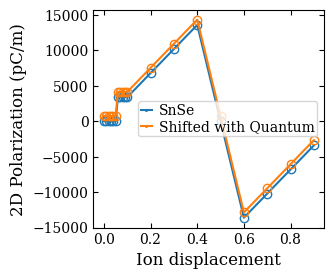

In [2]:
# Just replace whatever above this part to change plot stying
subplots = [1, 1]
figsize = [89, 75]  # in mm
labels = [
    [[r"Ion displacement", r"2D Polarization (pC/m)"]],
]  # [[[xlabel,ylabel]]]
limits = [                                  
    [[-0.01, 0.01, -20, 20]]
]  # axes limits [[[xmin,xmax,ymin,ymax]]]
major_minors = [
    [[0.004, 0.002, 10, 5]]
]  # tick location [[[x_major,x_minor,y_major,y_minor]]]


def plot(axes):
    for axs in axes:
        for ax in axs:
            data = pd.read_csv("./polarization.csv",
                               skipinitialspace=True, comment="#")
            # print(data)
            disp = data["disp"]
            height = 20  # Height in Angstrom
            pol_3d = (data["pIon"]+data["pEle"])/data["vol"]
            pol_quanta = data["b"]/data["vol"]
            # Copnversion Factor
            # e/(Ang^2) => 1.6*1E-19 columb/(Ang^2)
            # e/Ang => -1.6E-19/1E-10 columb/meter => -1600 pico-columb/meter
            pcoColmbMtr=-1600
            
            pol_2d = pol_3d*height*pcoColmbMtr
            quanta_2d  = pol_quanta*height*pcoColmbMtr
            # pol_ref = pol_2d[strain.index[strain == 0][0]]
            # pol_2d -= pol_ref
            ax.plot(
                disp,
                pol_2d,
                "o-",
                label="SnSe",
                mfc="none"
            )
            ax.plot(
                disp,
                pol_2d-2*quanta_2d,
                "o-",
                label="Shifted with Quantum",
                mfc="none"
            )
    # uncomment to give final touch
    set_labels(axes, labels)
    # set_limits(axes, limits)
    # set_major_minors(axes, major_minors)
    set_legend(axes)

fig, (axes) = init(figsize, subplots)
plot(axes)
# fig.subplots_adjust(
#     top=0.965,
#     bottom=0.155,
#     left=0.175,
#     right=0.935,
#     hspace=0.2,
#     wspace=0.2)
fig.tight_layout()
fig.savefig(f"pol-vs-displacement.svg")
plt.show()